In [1]:
import numpy as np
import cv2
import glob
import os 


In [2]:
stopping_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 45, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
ObjectPoints = [] # 3d point in real world space
ImagePoints = [] # 2d points in image plane.



In [22]:
basefolder= r'C:\Users\mbhattac\OneDrive - HERE Global B.V-\coding\opencv_book\Chapter09\Section3\images\\'

os.chdir(basefolder)


In [4]:
images = glob.glob(basefolder + "*.jpg")


In [5]:
images

['C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\Clipped Image.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\Image wth chess board pattern.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\left01.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\left02.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\left03.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\left04.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\left05.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section3\\images\\left06.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-

In [6]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    status, inner_corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if status == True:
        ObjectPoints.append(objp)

        refined_corners = cv2.cornerSubPix(gray,inner_corners ,(13,13),(-1,-1),stopping_criteria )
        ImagePoints.append(refined_corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), refined_corners,status)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)
        cv2.imwrite('Image wth chess board pattern.jpg',img )


In [7]:
cv2.destroyAllWindows()


In [8]:
caliberation_error, camera_matrix, distortion_coff, rvecs, tvecs = cv2.calibrateCamera(ObjectPoints, ImagePoints, gray.shape[::-1],None,None)

# select a sample image & display it 
sample_image = cv2.imread(basefolder+ "left12.jpg")
cv2.imshow('Sample Image',sample_image )
cv2.imwrite('Sample Image.jpg',sample_image )
h,  w = sample_image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(camera_matrix,distortion_coff,(w,h),0.8,(w,h))


In [9]:
# undistort
undistorted_sample_image= cv2.undistort(sample_image, camera_matrix, distortion_coff, None, newcameramtx)
cv2.imshow('Undistorted Image',undistorted_sample_image )
cv2.imwrite('Undistorted Image.jpg',undistorted_sample_image )


True

In [10]:
# crop the image
x,y,w,h = roi
clipped_sample_image = undistorted_sample_image[y:y+h, x:x+w]
cv2.imshow('Clipped Image',clipped_sample_image )
cv2.imwrite('Clipped Image.jpg',clipped_sample_image )



True

In [11]:
# undistort it using another method 
mapx,mapy = cv2.initUndistortRectifyMap(camera_matrix,distortion_coff,None,newcameramtx,(w,h),5)
undistorted_new = cv2.remap(clipped_sample_image,mapx,mapy,cv2.INTER_LINEAR)


In [12]:
# crop the image
x,y,w,h = roi
undistorted_new = undistorted_new[y:y+h, x:x+w]
cv2.imshow('Second undistorted Image',undistorted_new  )
cv2.imwrite('Second undistorted Image.jpg',undistorted_new  )


True

In [13]:
cv2.destroyAllWindows()


In [14]:
from cv2 import aruco

In [15]:
print([boards for boards in dir(aruco) if 'DICT' in boards ])

['DICT_4X4_100', 'DICT_4X4_1000', 'DICT_4X4_250', 'DICT_4X4_50', 'DICT_5X5_100', 'DICT_5X5_1000', 'DICT_5X5_250', 'DICT_5X5_50', 'DICT_6X6_100', 'DICT_6X6_1000', 'DICT_6X6_250', 'DICT_6X6_50', 'DICT_7X7_100', 'DICT_7X7_1000', 'DICT_7X7_250', 'DICT_7X7_50', 'DICT_ARUCO_ORIGINAL']


In [16]:
aruco_dict = aruco.Dictionary_get( aruco.DICT_6X6_50 )

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl


In [18]:
markerLength = 1
markerSeparation = 0.5   
targetwidth = 3
targetheight = 3


In [19]:
board = aruco.GridBoard_create(targetwidth, targetheight, markerLength, markerSeparation, aruco_dict)

(-0.5, 999.5, 999.5, -0.5)

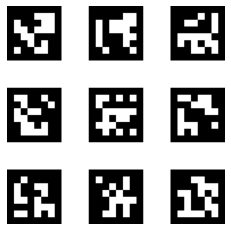

In [20]:
imboard = board.draw((1000, 1000))
handle = plt.imshow(imboard,cmap='gray')
plt.axis('off')

In [24]:
plt.savefig(basefolder + "/aruco_markers.png")

<Figure size 432x288 with 0 Axes>

In [25]:
arucoParams = aruco.DetectorParameters_create()

In [26]:
camera = cv2.VideoCapture(0)

In [27]:
while True:
    status, detected_image = camera.read()
    img_aruco = detected_image 
    im_gray = cv2.cvtColor(detected_image ,cv2.COLOR_RGB2GRAY)
    h,  w = im_gray.shape[:2]
    dst = cv2.undistort(im_gray, camera_matrix, distortion_coff, None, newcameramtx)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(dst, aruco_dict, parameters=arucoParams)
    cv2.imshow("original", im_gray)
    if corners == None:
        print ("pass")
    else:
        status, Rotation, Translation = aruco.estimatePoseBoard(corners, ids, board, newcameramtx, distortion_coff) # For a board
        if status != 0:
            img_aruco = aruco.drawDetectedMarkers(detected_image, corners, ids, (0,255,0))
            img_aruco = aruco.drawAxis(img_aruco, newcameramtx, distortion_coff, Rotation, Translation, 10)    # axis length 100 can be changed according to your requirement

        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.imwrite('detected aruco pattern.jpg', img_aruco)
            break;
    cv2.imshow("World co-ordinate frame axes", img_aruco)


In [28]:
camera.release()
cv2.destroyAllWindows()
